In [1]:
!pip install ultralytics

   ---------------------------------------- 0.0/872.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/872.8 kB ? eta -:--:--
   --- ----------------------------------- 71.7/872.8 kB 787.7 kB/s eta 0:00:02
   ------- -------------------------------- 174.1/872.8 kB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 235.5/872.8 kB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 368.6/872.8 kB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 491.5/872.8 kB 1.9 MB/s eta 0:00:01
   ---------------------------- ----------- 614.4/872.8 kB 2.1 MB/s eta 0:00:01
   ----------------------------------- ---- 778.2/872.8 kB 2.3 MB/s eta 0:00:01
   ------------------------------------- -- 809.0/872.8 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  870.4/872.8 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 872.8/872.8 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ?

In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8s.pt")
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:10<00:00, 2.25MB/s]


In [4]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
PATH = '/content/drive/MyDrive/Dataset/data.yaml'
SAVE_PATH = '/content/drive/MyDrive/Extracted'

In [6]:
model.train(data=PATH, epochs=300, batch = 32 , project=SAVE_PATH, name="SIGN_DETECT")  # train the model
metrics = model.val()

Ultralytics YOLOv8.2.95  Python-3.12.4 torch-2.4.1+cpu CPU (AMD Ryzen 5 5625U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Dataset/data.yaml, epochs=300, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Extracted, name=SIGN_DETECT, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

RuntimeError: Dataset '/content/drive/MyDrive/Dataset/data.yaml' error  '/content/drive/MyDrive/Dataset/data.yaml' does not exist

In [ ]:
result = model('A.webp')


image 1/1 /content/A.webp: 448x640 3 Bans, 1 Warning, 133.7ms
Speed: 3.3ms preprocess, 133.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


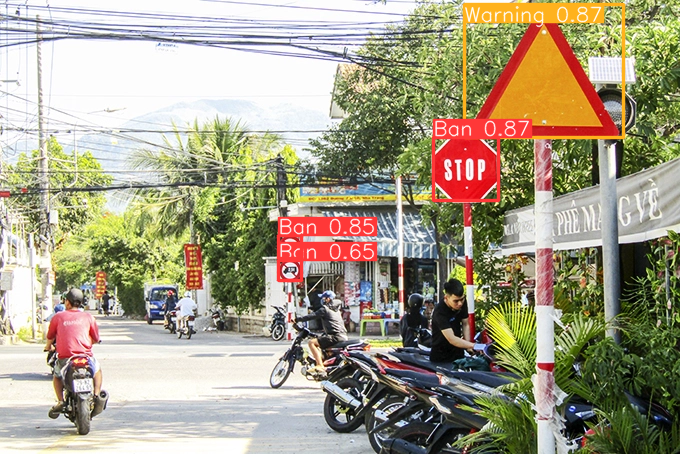

In [ ]:
from PIL import Image
from IPython.display import display

for r in result:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # convert BGR to RGB
    display(im)  # display the image in Google Colab


In [4]:
bestModel = YOLO('/content/drive/MyDrive/Extracted/SIGN_DETECT9/weights/best.pt')

In [ ]:
bestModel.export(format= 'tflite')

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Extracted/SIGN_DETECT9/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'sng4onnx>=1.0.1', 'onnxslim==0.1.28', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 264.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 206.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 322.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 264.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 164MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 46.35file/s]



ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: slimming with onnxslim 0.1.28...
ONNX: export success ✅ 2.5s, saved as '/content/drive/MyDrive/Extracted/SIGN_DETECT9/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


In [8]:
result = bestModel('/content/71F3QrdJpsL.jpg')


image 1/1 /content/71F3QrdJpsL.jpg: 640x640 2 Bans, 619.2ms
Speed: 6.8ms preprocess, 619.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


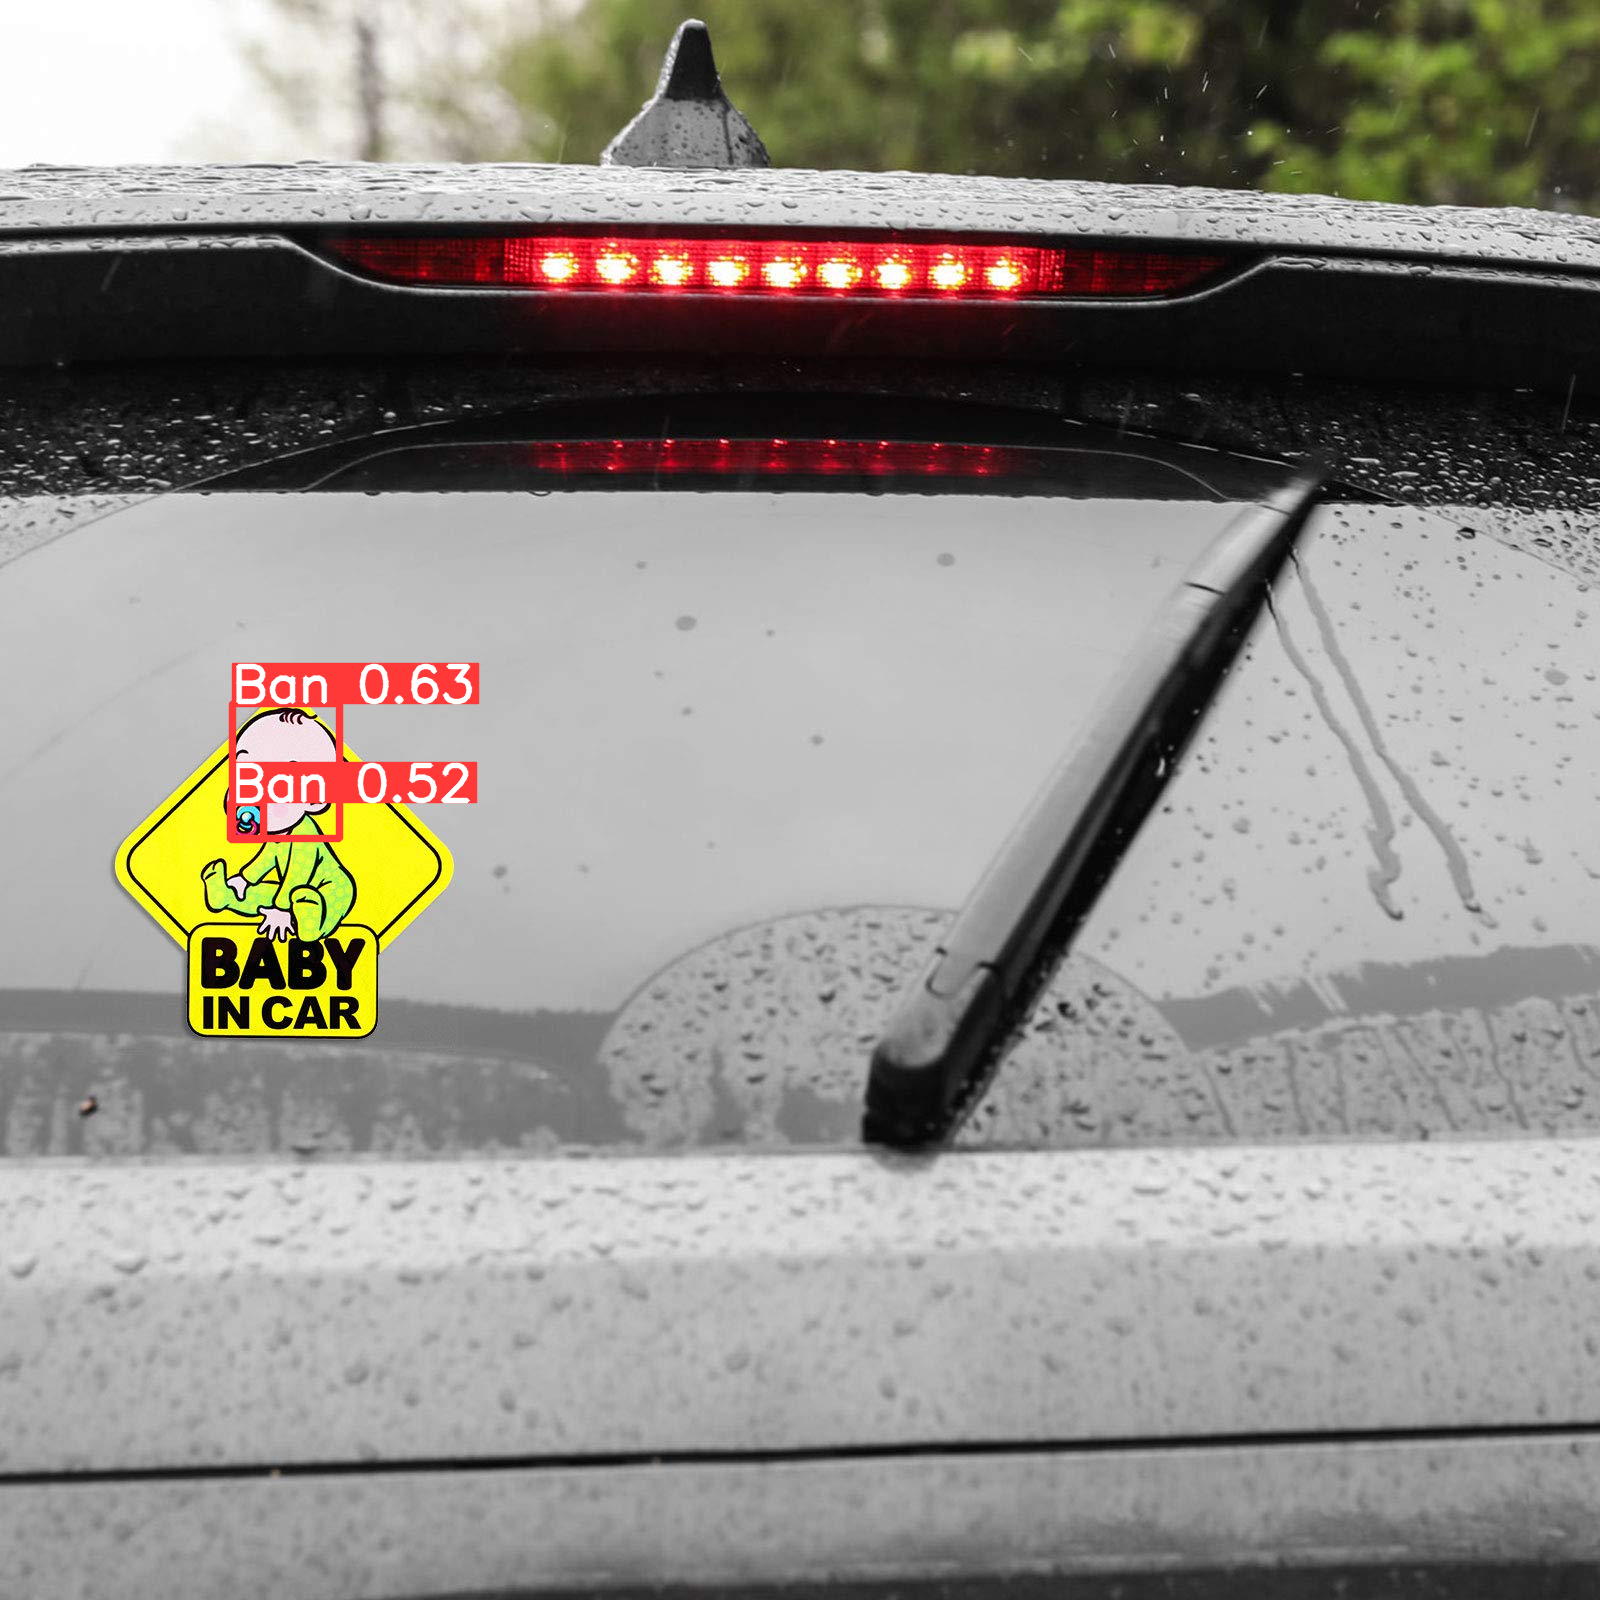

In [9]:
from PIL import Image
from IPython.display import display

for r in result:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # convert BGR to RGB
    display(im)  # display the image in Google Colab
